# ECJ Beta Test: Data Summary and Exploration
A look at the data we gathered as part of the ECJ Beta test.

In [1]:
import sys
sys.path.append("../")
from src.data import make_airthings_dataset,make_purpleair_dataset, make_dashboard
from src.visualization import visualize

import pandas as pd
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

<a id="toc"></a>

# Table of Contents
1. [Experiment Details](#details)
2. [Beta Test](#beta)

---

<a id="details"></a>

# Experiment Details
Important Dates:
* Deployment Start: 03/29/2022
* Deployment End: 04/??/2022

Devices were deployed at different points so might not all start logging data at the given start time.

---

<a id="beta"></a>

[Back to ToC](#toc)
# Beta Test

In [6]:
at_data = pd.read_csv("../data/processed/airthings-data-20220329-20220513.csv",
                      index_col="timestamp",parse_dates=True,infer_datetime_format=True)

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/airthings-data-20220329-20220513.csv'

In [ ]:
devices = at_data["device"].unique()
print("Number of Devices:", len(devices))
for device in devices:
    print(f"\t{device}")

## Data Availability

In [4]:
summary = visualize.AirThingsSummary()

2930040905


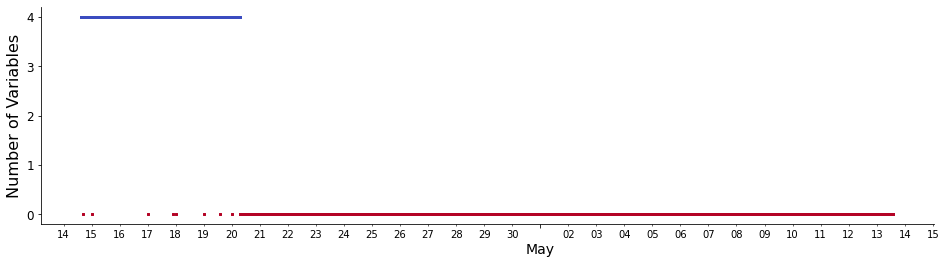

2930041730


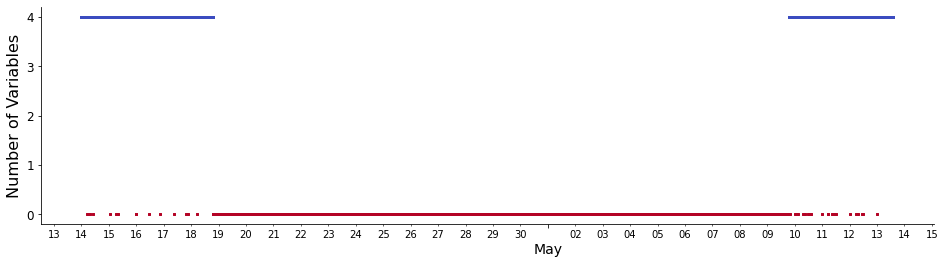

2930041961


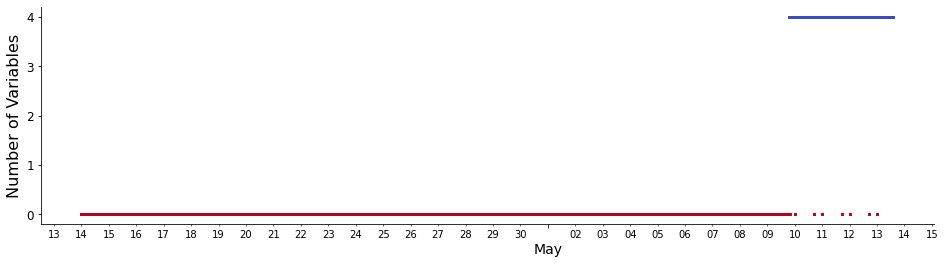

2930042002


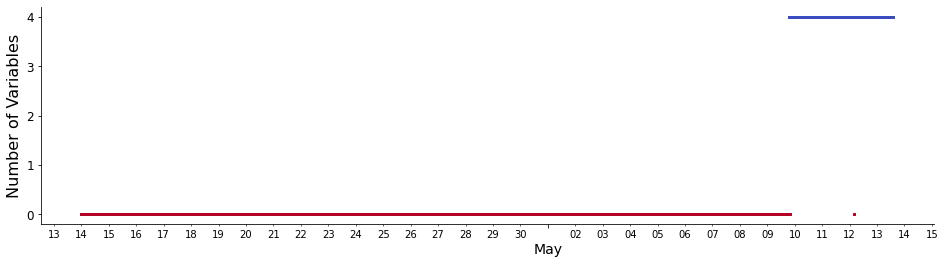

2930042154


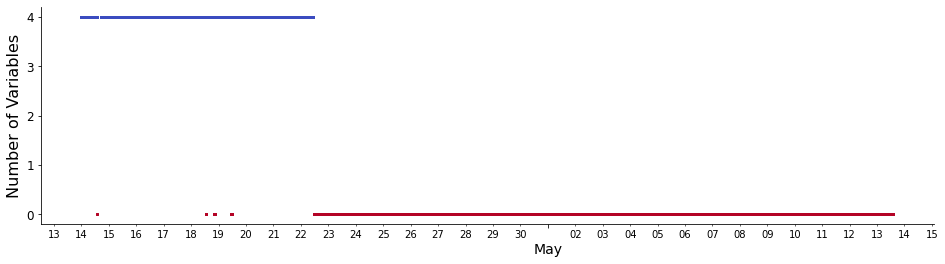

2930042168


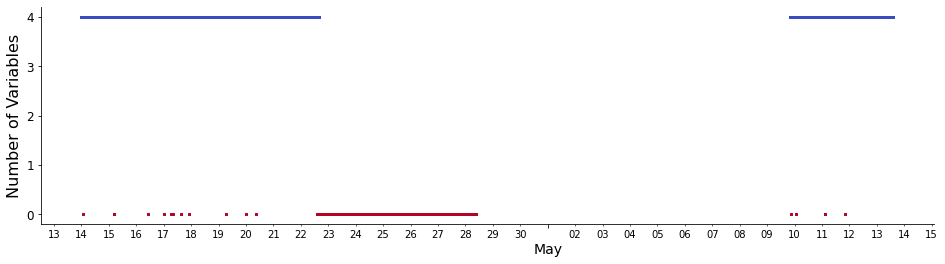

2930042428


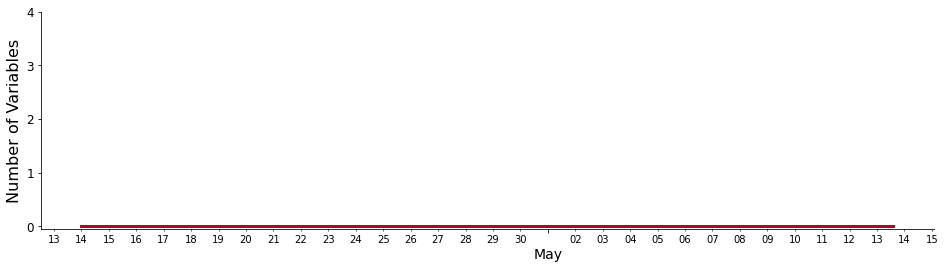

2930042521


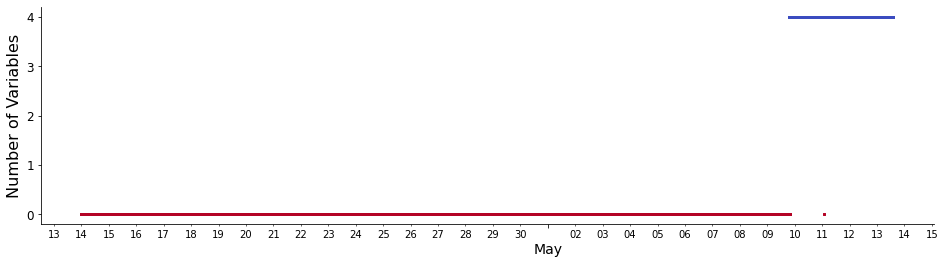

2930042601


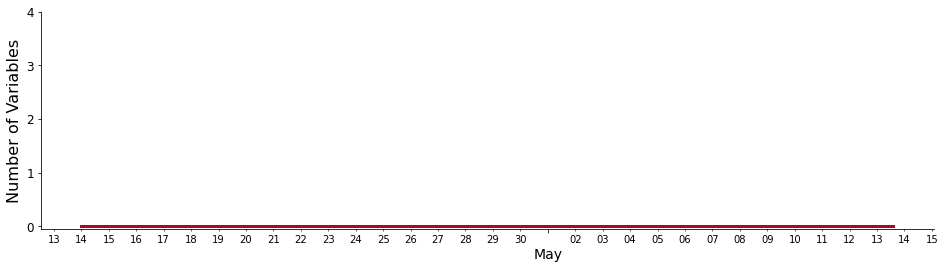

In [5]:
for device in at_data["device"].unique():
    data_device = at_data[at_data["device"] == device]
    print(device)
    summary.plot_data_availability(data_device)

<div class="alert alert-success">
    
The main issues seemed to be associated with the batteris dieing and us just not knowing it. 

</div>

Next steps are to see how long the batteries last, but even better would be to include some monitoring of the battery status which should be possible.

## Debugging Issues
To investigate the issues with the Beacon + AirThings connectivity, I will need to view the journal entries for the service we have running on the RPi at the specific time the sensor went offline or started recording NaNs for each entry. Let's hope the logging was set up properly...

* This [page](https://www.digitalocean.com/community/tutorials/how-to-use-journalctl-to-view-and-manipulate-systemd-logs) provides a nice overview of some of the flags that can be used with `journalctl` -- the most important of which seems to be the time window. In general, the command should be:

```bash
sudo journalctl --since "yyyy-mm-dd HH:MM:SS"
```

### Device 0905

In [ ]:
data_0905 = at_data[at_data["device"] == 2930040905]
#data_0905[data_0905.index > datetime(2022,3,4,11,13)].head()

### Device 1730

In [ ]:
data_1730 = at_data[at_data["device"] == 2930041730]
#data_1730[data_1730.index > datetime(2022,3,4,11,13)].head()

### Device 1961

In [ ]:
data_1961 = at_data[at_data["device"] == 2930041961]
#data_1961[data_1961.index > datetime(2022,3,4,11,13)].head()

### Device 2002

In [ ]:
data_2002 = at_data[at_data["device"] == 2930042002]
#data_2002[data_2002.index > datetime(2022,3,9,15,1)].head()

### Device 2307

In [ ]:
data_2307 = at_data[at_data["device"] == 2930042307]
#data_2307[data_2307.index > datetime(2022,3,9,15,1)].head()

### Device 2428

In [ ]:
data_2428 = at_data[at_data["device"] == 2930042428]
#data_2428[data_2428.index > datetime(2022,3,8,18,50)].head()

### Device 2521

In [ ]:
data_2521 = at_data[at_data["device"] == 2930042521]
#data_2521[data_2521.index > datetime(2022,3,10,3,17)].head()

### Device 2601

In [ ]:
data_2601 = at_data[at_data["device"] == 2930042601]
#data_2601[data_2601.index > datetime(2022,3,10,3,17)].head()

---